In [13]:
from datasketch import MinHash, MinHashLSH
from LocalitySensitiveHashing import *
import pandas as pd    
import json

In [14]:
#we have kept the filename and list of references as a dictionary and savced it in a text file
js = {}
with open('dictionary.txt') as f:     #read the file and save it into a dictionary
    data = f.read()
    
js = json.loads(data)

In [15]:
l1 = []
for i, j in js.items():
    if len(j)!=0:
        l1.append(j)     #obtain all the non empty list of references
        

print(len(l1))

9680


In [16]:
l1.sort()

In [17]:
def shingles(l1, k):
    dataset = []
    universal_list =[]
    
    count=0
    for document in l1:
        reference = (" ".join(document))    #join all references and make into a single one so that we can genrate shingles
        ele = reference
        temp =[]

        single_ref_list = list(ele.split(" "))  #add every word into a list
        for ptr in range(0, len(single_ref_list)-k+1):   #perform slicing window word wise with window size as k till end of list
            temp_val = single_ref_list[ptr:(ptr+k):1]   
            temp_val = (" ".join(temp_val))  #merge the words in the window into a string ==> this will be a shingle
            temp.append(temp_val)  #append the shingle to the lost of shi ngles for that document
                
        dataset.append(temp)  #append the list to the main dataset of shingles
        print("dataset iteration number ======> " + str(count))
        count = count+1
            
            
    print()   
    print('----------------------------')   
                 
    
    return dataset


In [25]:
count_list ={}
matched_dict =[]
shing_size = [2,3,4,5,6,7,8,9,10]      #perform lsh on these shingling paramteres

for s in shing_size:
    
    dataset1 = shingles(l1, s)  #generate shingles
    
    dataset = []
    for i in dataset1:
        dataset.append(set(i))
           
    hashFunctions = []      #stors hash functions here
    for i in range(0, len(l1)):    #generate hashfunctions for all the documents
        hashFunctions.append(MinHash(num_perm=128))
        
    for i in range(0, len(l1)):
        hashFunctions[i]= MinHash(num_perm=128)
        for token in dataset[i]:
            hashFunctions[i].update(token.encode('utf8'))     #update the hashfunction as per the shingles
    
    lsh = MinHashLSH(threshold=0.35, num_perm=128)    #set threshold value to 35% for this question
    
    for i in range(0, len(hashFunctions)):
            temp = i
            lsh.insert(temp, hashFunctions[i])   #insert the hashes into lsh

    dict ={}
    for i in range(0, len(hashFunctions)):
        result = lsh.query(hashFunctions[i])    #run the query for all the documents to obtain the candidate pairs
        if len(result)>1:
            result.remove(i)
            dict[i] = result

    key = dict.keys()

    for j, k in dict.items():
    
        val_list = dict[j]
        val_list2 = set(val_list)
        for i in k:
            if i in key:
                val = set(dict[i])
                val = val - val_list2    #here we are eleminating the duplicate pairs
                val.remove(j)
                dict[i]=val
            
    remove_list = []         

    for i, j in dict.items():
        if j == set():
            remove_list.append(i)    #find the sets which are empty from the list of candidate pairs
        
    for i in remove_list:
        dict.pop(i)   #remove empty sets from the list of candidate pairs
        
    val1 ={}
    val1[s] = dict
    matched_dict.append(val1)     #storeing the papers which matched
    
    candidate_pair = len(dict.keys())
    count_list[s] = candidate_pair     #storing the count of candidate pairs
    
    print("size ===>  " + str(s))


dataset iteration number ======> 0
dataset iteration number ======> 1
dataset iteration number ======> 2
dataset iteration number ======> 3
dataset iteration number ======> 4
dataset iteration number ======> 5
dataset iteration number ======> 6
dataset iteration number ======> 7
dataset iteration number ======> 8
dataset iteration number ======> 9
dataset iteration number ======> 10
dataset iteration number ======> 11
dataset iteration number ======> 12
dataset iteration number ======> 13
dataset iteration number ======> 14
dataset iteration number ======> 15
dataset iteration number ======> 16
dataset iteration number ======> 17
dataset iteration number ======> 18
dataset iteration number ======> 19
dataset iteration number ======> 20
dataset iteration number ======> 21
dataset iteration number ======> 22
dataset iteration number ======> 23
dataset iteration number ======> 24
dataset iteration number ======> 25
dataset iteration number ======> 26
dataset iteration number ======> 27
da

dataset iteration number ======> 2462
dataset iteration number ======> 2463
dataset iteration number ======> 2464
dataset iteration number ======> 2465
dataset iteration number ======> 2466
dataset iteration number ======> 2467
dataset iteration number ======> 2468
dataset iteration number ======> 2469
dataset iteration number ======> 2470
dataset iteration number ======> 2471
dataset iteration number ======> 2472
dataset iteration number ======> 2473
dataset iteration number ======> 2474
dataset iteration number ======> 2475
dataset iteration number ======> 2476
dataset iteration number ======> 2477
dataset iteration number ======> 2478
dataset iteration number ======> 2479
dataset iteration number ======> 2480
dataset iteration number ======> 2481
dataset iteration number ======> 2482
dataset iteration number ======> 2483
dataset iteration number ======> 2484
dataset iteration number ======> 2485
dataset iteration number ======> 2486
dataset iteration number ======> 2487
dataset iter

dataset iteration number ======> 4763
dataset iteration number ======> 4764
dataset iteration number ======> 4765
dataset iteration number ======> 4766
dataset iteration number ======> 4767
dataset iteration number ======> 4768
dataset iteration number ======> 4769
dataset iteration number ======> 4770
dataset iteration number ======> 4771
dataset iteration number ======> 4772
dataset iteration number ======> 4773
dataset iteration number ======> 4774
dataset iteration number ======> 4775
dataset iteration number ======> 4776
dataset iteration number ======> 4777
dataset iteration number ======> 4778
dataset iteration number ======> 4779
dataset iteration number ======> 4780
dataset iteration number ======> 4781
dataset iteration number ======> 4782
dataset iteration number ======> 4783
dataset iteration number ======> 4784
dataset iteration number ======> 4785
dataset iteration number ======> 4786
dataset iteration number ======> 4787
dataset iteration number ======> 4788
dataset iter

dataset iteration number ======> 7254
dataset iteration number ======> 7255
dataset iteration number ======> 7256
dataset iteration number ======> 7257
dataset iteration number ======> 7258
dataset iteration number ======> 7259
dataset iteration number ======> 7260
dataset iteration number ======> 7261
dataset iteration number ======> 7262
dataset iteration number ======> 7263
dataset iteration number ======> 7264
dataset iteration number ======> 7265
dataset iteration number ======> 7266
dataset iteration number ======> 7267
dataset iteration number ======> 7268
dataset iteration number ======> 7269
dataset iteration number ======> 7270
dataset iteration number ======> 7271
dataset iteration number ======> 7272
dataset iteration number ======> 7273
dataset iteration number ======> 7274
dataset iteration number ======> 7275
dataset iteration number ======> 7276
dataset iteration number ======> 7277
dataset iteration number ======> 7278
dataset iteration number ======> 7279
dataset iter

size ===>  2
dataset iteration number ======> 0
dataset iteration number ======> 1
dataset iteration number ======> 2
dataset iteration number ======> 3
dataset iteration number ======> 4
dataset iteration number ======> 5
dataset iteration number ======> 6
dataset iteration number ======> 7
dataset iteration number ======> 8
dataset iteration number ======> 9
dataset iteration number ======> 10
dataset iteration number ======> 11
dataset iteration number ======> 12
dataset iteration number ======> 13
dataset iteration number ======> 14
dataset iteration number ======> 15
dataset iteration number ======> 16
dataset iteration number ======> 17
dataset iteration number ======> 18
dataset iteration number ======> 19
dataset iteration number ======> 20
dataset iteration number ======> 21
dataset iteration number ======> 22
dataset iteration number ======> 23
dataset iteration number ======> 24
dataset iteration number ======> 25
dataset iteration number ======> 26
dataset iteration number 

dataset iteration number ======> 2717
dataset iteration number ======> 2718
dataset iteration number ======> 2719
dataset iteration number ======> 2720
dataset iteration number ======> 2721
dataset iteration number ======> 2722
dataset iteration number ======> 2723
dataset iteration number ======> 2724
dataset iteration number ======> 2725
dataset iteration number ======> 2726
dataset iteration number ======> 2727
dataset iteration number ======> 2728
dataset iteration number ======> 2729
dataset iteration number ======> 2730
dataset iteration number ======> 2731
dataset iteration number ======> 2732
dataset iteration number ======> 2733
dataset iteration number ======> 2734
dataset iteration number ======> 2735
dataset iteration number ======> 2736
dataset iteration number ======> 2737
dataset iteration number ======> 2738
dataset iteration number ======> 2739
dataset iteration number ======> 2740
dataset iteration number ======> 2741
dataset iteration number ======> 2742
dataset iter

dataset iteration number ======> 5270
dataset iteration number ======> 5271
dataset iteration number ======> 5272
dataset iteration number ======> 5273
dataset iteration number ======> 5274
dataset iteration number ======> 5275
dataset iteration number ======> 5276
dataset iteration number ======> 5277
dataset iteration number ======> 5278
dataset iteration number ======> 5279
dataset iteration number ======> 5280
dataset iteration number ======> 5281
dataset iteration number ======> 5282
dataset iteration number ======> 5283
dataset iteration number ======> 5284
dataset iteration number ======> 5285
dataset iteration number ======> 5286
dataset iteration number ======> 5287
dataset iteration number ======> 5288
dataset iteration number ======> 5289
dataset iteration number ======> 5290
dataset iteration number ======> 5291
dataset iteration number ======> 5292
dataset iteration number ======> 5293
dataset iteration number ======> 5294
dataset iteration number ======> 5295
dataset iter

dataset iteration number ======> 6479
dataset iteration number ======> 6480
dataset iteration number ======> 6481
dataset iteration number ======> 6482
dataset iteration number ======> 6483
dataset iteration number ======> 6484
dataset iteration number ======> 6485
dataset iteration number ======> 6486
dataset iteration number ======> 6487
dataset iteration number ======> 6488
dataset iteration number ======> 6489
dataset iteration number ======> 6490
dataset iteration number ======> 6491
dataset iteration number ======> 6492
dataset iteration number ======> 6493
dataset iteration number ======> 6494
dataset iteration number ======> 6495
dataset iteration number ======> 6496
dataset iteration number ======> 6497
dataset iteration number ======> 6498
dataset iteration number ======> 6499
dataset iteration number ======> 6500
dataset iteration number ======> 6501
dataset iteration number ======> 6502
dataset iteration number ======> 6503
dataset iteration number ======> 6504
dataset iter

dataset iteration number ======> 8999
dataset iteration number ======> 9000
dataset iteration number ======> 9001
dataset iteration number ======> 9002
dataset iteration number ======> 9003
dataset iteration number ======> 9004
dataset iteration number ======> 9005
dataset iteration number ======> 9006
dataset iteration number ======> 9007
dataset iteration number ======> 9008
dataset iteration number ======> 9009
dataset iteration number ======> 9010
dataset iteration number ======> 9011
dataset iteration number ======> 9012
dataset iteration number ======> 9013
dataset iteration number ======> 9014
dataset iteration number ======> 9015
dataset iteration number ======> 9016
dataset iteration number ======> 9017
dataset iteration number ======> 9018
dataset iteration number ======> 9019
dataset iteration number ======> 9020
dataset iteration number ======> 9021
dataset iteration number ======> 9022
dataset iteration number ======> 9023
dataset iteration number ======> 9024
dataset iter

size ===>  3
dataset iteration number ======> 0
dataset iteration number ======> 1
dataset iteration number ======> 2
dataset iteration number ======> 3
dataset iteration number ======> 4
dataset iteration number ======> 5
dataset iteration number ======> 6
dataset iteration number ======> 7
dataset iteration number ======> 8
dataset iteration number ======> 9
dataset iteration number ======> 10
dataset iteration number ======> 11
dataset iteration number ======> 12
dataset iteration number ======> 13
dataset iteration number ======> 14
dataset iteration number ======> 15
dataset iteration number ======> 16
dataset iteration number ======> 17
dataset iteration number ======> 18
dataset iteration number ======> 19
dataset iteration number ======> 20
dataset iteration number ======> 21
dataset iteration number ======> 22
dataset iteration number ======> 23
dataset iteration number ======> 24
dataset iteration number ======> 25
dataset iteration number ======> 26
dataset iteration number 

dataset iteration number ======> 2056
dataset iteration number ======> 2057
dataset iteration number ======> 2058
dataset iteration number ======> 2059
dataset iteration number ======> 2060
dataset iteration number ======> 2061
dataset iteration number ======> 2062
dataset iteration number ======> 2063
dataset iteration number ======> 2064
dataset iteration number ======> 2065
dataset iteration number ======> 2066
dataset iteration number ======> 2067
dataset iteration number ======> 2068
dataset iteration number ======> 2069
dataset iteration number ======> 2070
dataset iteration number ======> 2071
dataset iteration number ======> 2072
dataset iteration number ======> 2073
dataset iteration number ======> 2074
dataset iteration number ======> 2075
dataset iteration number ======> 2076
dataset iteration number ======> 2077
dataset iteration number ======> 2078
dataset iteration number ======> 2079
dataset iteration number ======> 2080
dataset iteration number ======> 2081
dataset iter

dataset iteration number ======> 3528
dataset iteration number ======> 3529
dataset iteration number ======> 3530
dataset iteration number ======> 3531
dataset iteration number ======> 3532
dataset iteration number ======> 3533
dataset iteration number ======> 3534
dataset iteration number ======> 3535
dataset iteration number ======> 3536
dataset iteration number ======> 3537
dataset iteration number ======> 3538
dataset iteration number ======> 3539
dataset iteration number ======> 3540
dataset iteration number ======> 3541
dataset iteration number ======> 3542
dataset iteration number ======> 3543
dataset iteration number ======> 3544
dataset iteration number ======> 3545
dataset iteration number ======> 3546
dataset iteration number ======> 3547
dataset iteration number ======> 3548
dataset iteration number ======> 3549
dataset iteration number ======> 3550
dataset iteration number ======> 3551
dataset iteration number ======> 3552
dataset iteration number ======> 3553
dataset iter

dataset iteration number ======> 5555
dataset iteration number ======> 5556
dataset iteration number ======> 5557
dataset iteration number ======> 5558
dataset iteration number ======> 5559
dataset iteration number ======> 5560
dataset iteration number ======> 5561
dataset iteration number ======> 5562
dataset iteration number ======> 5563
dataset iteration number ======> 5564
dataset iteration number ======> 5565
dataset iteration number ======> 5566
dataset iteration number ======> 5567
dataset iteration number ======> 5568
dataset iteration number ======> 5569
dataset iteration number ======> 5570
dataset iteration number ======> 5571
dataset iteration number ======> 5572
dataset iteration number ======> 5573
dataset iteration number ======> 5574
dataset iteration number ======> 5575
dataset iteration number ======> 5576
dataset iteration number ======> 5577
dataset iteration number ======> 5578
dataset iteration number ======> 5579
dataset iteration number ======> 5580
dataset iter

dataset iteration number ======> 7481
dataset iteration number ======> 7482
dataset iteration number ======> 7483
dataset iteration number ======> 7484
dataset iteration number ======> 7485
dataset iteration number ======> 7486
dataset iteration number ======> 7487
dataset iteration number ======> 7488
dataset iteration number ======> 7489
dataset iteration number ======> 7490
dataset iteration number ======> 7491
dataset iteration number ======> 7492
dataset iteration number ======> 7493
dataset iteration number ======> 7494
dataset iteration number ======> 7495
dataset iteration number ======> 7496
dataset iteration number ======> 7497
dataset iteration number ======> 7498
dataset iteration number ======> 7499
dataset iteration number ======> 7500
dataset iteration number ======> 7501
dataset iteration number ======> 7502
dataset iteration number ======> 7503
dataset iteration number ======> 7504
dataset iteration number ======> 7505
dataset iteration number ======> 7506
dataset iter

dataset iteration number ======> 9159
dataset iteration number ======> 9160
dataset iteration number ======> 9161
dataset iteration number ======> 9162
dataset iteration number ======> 9163
dataset iteration number ======> 9164
dataset iteration number ======> 9165
dataset iteration number ======> 9166
dataset iteration number ======> 9167
dataset iteration number ======> 9168
dataset iteration number ======> 9169
dataset iteration number ======> 9170
dataset iteration number ======> 9171
dataset iteration number ======> 9172
dataset iteration number ======> 9173
dataset iteration number ======> 9174
dataset iteration number ======> 9175
dataset iteration number ======> 9176
dataset iteration number ======> 9177
dataset iteration number ======> 9178
dataset iteration number ======> 9179
dataset iteration number ======> 9180
dataset iteration number ======> 9181
dataset iteration number ======> 9182
dataset iteration number ======> 9183
dataset iteration number ======> 9184
dataset iter

size ===>  4
dataset iteration number ======> 0
dataset iteration number ======> 1
dataset iteration number ======> 2
dataset iteration number ======> 3
dataset iteration number ======> 4
dataset iteration number ======> 5
dataset iteration number ======> 6
dataset iteration number ======> 7
dataset iteration number ======> 8
dataset iteration number ======> 9
dataset iteration number ======> 10
dataset iteration number ======> 11
dataset iteration number ======> 12
dataset iteration number ======> 13
dataset iteration number ======> 14
dataset iteration number ======> 15
dataset iteration number ======> 16
dataset iteration number ======> 17
dataset iteration number ======> 18
dataset iteration number ======> 19
dataset iteration number ======> 20
dataset iteration number ======> 21
dataset iteration number ======> 22
dataset iteration number ======> 23
dataset iteration number ======> 24
dataset iteration number ======> 25
dataset iteration number ======> 26
dataset iteration number 

dataset iteration number ======> 1954
dataset iteration number ======> 1955
dataset iteration number ======> 1956
dataset iteration number ======> 1957
dataset iteration number ======> 1958
dataset iteration number ======> 1959
dataset iteration number ======> 1960
dataset iteration number ======> 1961
dataset iteration number ======> 1962
dataset iteration number ======> 1963
dataset iteration number ======> 1964
dataset iteration number ======> 1965
dataset iteration number ======> 1966
dataset iteration number ======> 1967
dataset iteration number ======> 1968
dataset iteration number ======> 1969
dataset iteration number ======> 1970
dataset iteration number ======> 1971
dataset iteration number ======> 1972
dataset iteration number ======> 1973
dataset iteration number ======> 1974
dataset iteration number ======> 1975
dataset iteration number ======> 1976
dataset iteration number ======> 1977
dataset iteration number ======> 1978
dataset iteration number ======> 1979
dataset iter

dataset iteration number ======> 3901
dataset iteration number ======> 3902
dataset iteration number ======> 3903
dataset iteration number ======> 3904
dataset iteration number ======> 3905
dataset iteration number ======> 3906
dataset iteration number ======> 3907
dataset iteration number ======> 3908
dataset iteration number ======> 3909
dataset iteration number ======> 3910
dataset iteration number ======> 3911
dataset iteration number ======> 3912
dataset iteration number ======> 3913
dataset iteration number ======> 3914
dataset iteration number ======> 3915
dataset iteration number ======> 3916
dataset iteration number ======> 3917
dataset iteration number ======> 3918
dataset iteration number ======> 3919
dataset iteration number ======> 3920
dataset iteration number ======> 3921
dataset iteration number ======> 3922
dataset iteration number ======> 3923
dataset iteration number ======> 3924
dataset iteration number ======> 3925
dataset iteration number ======> 3926
dataset iter

dataset iteration number ======> 5692
dataset iteration number ======> 5693
dataset iteration number ======> 5694
dataset iteration number ======> 5695
dataset iteration number ======> 5696
dataset iteration number ======> 5697
dataset iteration number ======> 5698
dataset iteration number ======> 5699
dataset iteration number ======> 5700
dataset iteration number ======> 5701
dataset iteration number ======> 5702
dataset iteration number ======> 5703
dataset iteration number ======> 5704
dataset iteration number ======> 5705
dataset iteration number ======> 5706
dataset iteration number ======> 5707
dataset iteration number ======> 5708
dataset iteration number ======> 5709
dataset iteration number ======> 5710
dataset iteration number ======> 5711
dataset iteration number ======> 5712
dataset iteration number ======> 5713
dataset iteration number ======> 5714
dataset iteration number ======> 5715
dataset iteration number ======> 5716
dataset iteration number ======> 5717
dataset iter

dataset iteration number ======> 7429
dataset iteration number ======> 7430
dataset iteration number ======> 7431
dataset iteration number ======> 7432
dataset iteration number ======> 7433
dataset iteration number ======> 7434
dataset iteration number ======> 7435
dataset iteration number ======> 7436
dataset iteration number ======> 7437
dataset iteration number ======> 7438
dataset iteration number ======> 7439
dataset iteration number ======> 7440
dataset iteration number ======> 7441
dataset iteration number ======> 7442
dataset iteration number ======> 7443
dataset iteration number ======> 7444
dataset iteration number ======> 7445
dataset iteration number ======> 7446
dataset iteration number ======> 7447
dataset iteration number ======> 7448
dataset iteration number ======> 7449
dataset iteration number ======> 7450
dataset iteration number ======> 7451
dataset iteration number ======> 7452
dataset iteration number ======> 7453
dataset iteration number ======> 7454
dataset iter

dataset iteration number ======> 8683
dataset iteration number ======> 8684
dataset iteration number ======> 8685
dataset iteration number ======> 8686
dataset iteration number ======> 8687
dataset iteration number ======> 8688
dataset iteration number ======> 8689
dataset iteration number ======> 8690
dataset iteration number ======> 8691
dataset iteration number ======> 8692
dataset iteration number ======> 8693
dataset iteration number ======> 8694
dataset iteration number ======> 8695
dataset iteration number ======> 8696
dataset iteration number ======> 8697
dataset iteration number ======> 8698
dataset iteration number ======> 8699
dataset iteration number ======> 8700
dataset iteration number ======> 8701
dataset iteration number ======> 8702
dataset iteration number ======> 8703
dataset iteration number ======> 8704
dataset iteration number ======> 8705
dataset iteration number ======> 8706
dataset iteration number ======> 8707
dataset iteration number ======> 8708
dataset iter

size ===>  5
dataset iteration number ======> 0
dataset iteration number ======> 1
dataset iteration number ======> 2
dataset iteration number ======> 3
dataset iteration number ======> 4
dataset iteration number ======> 5
dataset iteration number ======> 6
dataset iteration number ======> 7
dataset iteration number ======> 8
dataset iteration number ======> 9
dataset iteration number ======> 10
dataset iteration number ======> 11
dataset iteration number ======> 12
dataset iteration number ======> 13
dataset iteration number ======> 14
dataset iteration number ======> 15
dataset iteration number ======> 16
dataset iteration number ======> 17
dataset iteration number ======> 18
dataset iteration number ======> 19
dataset iteration number ======> 20
dataset iteration number ======> 21
dataset iteration number ======> 22
dataset iteration number ======> 23
dataset iteration number ======> 24
dataset iteration number ======> 25
dataset iteration number ======> 26
dataset iteration number 

dataset iteration number ======> 2212
dataset iteration number ======> 2213
dataset iteration number ======> 2214
dataset iteration number ======> 2215
dataset iteration number ======> 2216
dataset iteration number ======> 2217
dataset iteration number ======> 2218
dataset iteration number ======> 2219
dataset iteration number ======> 2220
dataset iteration number ======> 2221
dataset iteration number ======> 2222
dataset iteration number ======> 2223
dataset iteration number ======> 2224
dataset iteration number ======> 2225
dataset iteration number ======> 2226
dataset iteration number ======> 2227
dataset iteration number ======> 2228
dataset iteration number ======> 2229
dataset iteration number ======> 2230
dataset iteration number ======> 2231
dataset iteration number ======> 2232
dataset iteration number ======> 2233
dataset iteration number ======> 2234
dataset iteration number ======> 2235
dataset iteration number ======> 2236
dataset iteration number ======> 2237
dataset iter

dataset iteration number ======> 4774
dataset iteration number ======> 4775
dataset iteration number ======> 4776
dataset iteration number ======> 4777
dataset iteration number ======> 4778
dataset iteration number ======> 4779
dataset iteration number ======> 4780
dataset iteration number ======> 4781
dataset iteration number ======> 4782
dataset iteration number ======> 4783
dataset iteration number ======> 4784
dataset iteration number ======> 4785
dataset iteration number ======> 4786
dataset iteration number ======> 4787
dataset iteration number ======> 4788
dataset iteration number ======> 4789
dataset iteration number ======> 4790
dataset iteration number ======> 4791
dataset iteration number ======> 4792
dataset iteration number ======> 4793
dataset iteration number ======> 4794
dataset iteration number ======> 4795
dataset iteration number ======> 4796
dataset iteration number ======> 4797
dataset iteration number ======> 4798
dataset iteration number ======> 4799
dataset iter

dataset iteration number ======> 6674
dataset iteration number ======> 6675
dataset iteration number ======> 6676
dataset iteration number ======> 6677
dataset iteration number ======> 6678
dataset iteration number ======> 6679
dataset iteration number ======> 6680
dataset iteration number ======> 6681
dataset iteration number ======> 6682
dataset iteration number ======> 6683
dataset iteration number ======> 6684
dataset iteration number ======> 6685
dataset iteration number ======> 6686
dataset iteration number ======> 6687
dataset iteration number ======> 6688
dataset iteration number ======> 6689
dataset iteration number ======> 6690
dataset iteration number ======> 6691
dataset iteration number ======> 6692
dataset iteration number ======> 6693
dataset iteration number ======> 6694
dataset iteration number ======> 6695
dataset iteration number ======> 6696
dataset iteration number ======> 6697
dataset iteration number ======> 6698
dataset iteration number ======> 6699
dataset iter

dataset iteration number ======> 8899
dataset iteration number ======> 8900
dataset iteration number ======> 8901
dataset iteration number ======> 8902
dataset iteration number ======> 8903
dataset iteration number ======> 8904
dataset iteration number ======> 8905
dataset iteration number ======> 8906
dataset iteration number ======> 8907
dataset iteration number ======> 8908
dataset iteration number ======> 8909
dataset iteration number ======> 8910
dataset iteration number ======> 8911
dataset iteration number ======> 8912
dataset iteration number ======> 8913
dataset iteration number ======> 8914
dataset iteration number ======> 8915
dataset iteration number ======> 8916
dataset iteration number ======> 8917
dataset iteration number ======> 8918
dataset iteration number ======> 8919
dataset iteration number ======> 8920
dataset iteration number ======> 8921
dataset iteration number ======> 8922
dataset iteration number ======> 8923
dataset iteration number ======> 8924
dataset iter

size ===>  6
dataset iteration number ======> 0
dataset iteration number ======> 1
dataset iteration number ======> 2
dataset iteration number ======> 3
dataset iteration number ======> 4
dataset iteration number ======> 5
dataset iteration number ======> 6
dataset iteration number ======> 7
dataset iteration number ======> 8
dataset iteration number ======> 9
dataset iteration number ======> 10
dataset iteration number ======> 11
dataset iteration number ======> 12
dataset iteration number ======> 13
dataset iteration number ======> 14
dataset iteration number ======> 15
dataset iteration number ======> 16
dataset iteration number ======> 17
dataset iteration number ======> 18
dataset iteration number ======> 19
dataset iteration number ======> 20
dataset iteration number ======> 21
dataset iteration number ======> 22
dataset iteration number ======> 23
dataset iteration number ======> 24
dataset iteration number ======> 25
dataset iteration number ======> 26
dataset iteration number 

dataset iteration number ======> 1762
dataset iteration number ======> 1763
dataset iteration number ======> 1764
dataset iteration number ======> 1765
dataset iteration number ======> 1766
dataset iteration number ======> 1767
dataset iteration number ======> 1768
dataset iteration number ======> 1769
dataset iteration number ======> 1770
dataset iteration number ======> 1771
dataset iteration number ======> 1772
dataset iteration number ======> 1773
dataset iteration number ======> 1774
dataset iteration number ======> 1775
dataset iteration number ======> 1776
dataset iteration number ======> 1777
dataset iteration number ======> 1778
dataset iteration number ======> 1779
dataset iteration number ======> 1780
dataset iteration number ======> 1781
dataset iteration number ======> 1782
dataset iteration number ======> 1783
dataset iteration number ======> 1784
dataset iteration number ======> 1785
dataset iteration number ======> 1786
dataset iteration number ======> 1787
dataset iter

dataset iteration number ======> 3255
dataset iteration number ======> 3256
dataset iteration number ======> 3257
dataset iteration number ======> 3258
dataset iteration number ======> 3259
dataset iteration number ======> 3260
dataset iteration number ======> 3261
dataset iteration number ======> 3262
dataset iteration number ======> 3263
dataset iteration number ======> 3264
dataset iteration number ======> 3265
dataset iteration number ======> 3266
dataset iteration number ======> 3267
dataset iteration number ======> 3268
dataset iteration number ======> 3269
dataset iteration number ======> 3270
dataset iteration number ======> 3271
dataset iteration number ======> 3272
dataset iteration number ======> 3273
dataset iteration number ======> 3274
dataset iteration number ======> 3275
dataset iteration number ======> 3276
dataset iteration number ======> 3277
dataset iteration number ======> 3278
dataset iteration number ======> 3279
dataset iteration number ======> 3280
dataset iter

dataset iteration number ======> 4997
dataset iteration number ======> 4998
dataset iteration number ======> 4999
dataset iteration number ======> 5000
dataset iteration number ======> 5001
dataset iteration number ======> 5002
dataset iteration number ======> 5003
dataset iteration number ======> 5004
dataset iteration number ======> 5005
dataset iteration number ======> 5006
dataset iteration number ======> 5007
dataset iteration number ======> 5008
dataset iteration number ======> 5009
dataset iteration number ======> 5010
dataset iteration number ======> 5011
dataset iteration number ======> 5012
dataset iteration number ======> 5013
dataset iteration number ======> 5014
dataset iteration number ======> 5015
dataset iteration number ======> 5016
dataset iteration number ======> 5017
dataset iteration number ======> 5018
dataset iteration number ======> 5019
dataset iteration number ======> 5020
dataset iteration number ======> 5021
dataset iteration number ======> 5022
dataset iter

dataset iteration number ======> 6408
dataset iteration number ======> 6409
dataset iteration number ======> 6410
dataset iteration number ======> 6411
dataset iteration number ======> 6412
dataset iteration number ======> 6413
dataset iteration number ======> 6414
dataset iteration number ======> 6415
dataset iteration number ======> 6416
dataset iteration number ======> 6417
dataset iteration number ======> 6418
dataset iteration number ======> 6419
dataset iteration number ======> 6420
dataset iteration number ======> 6421
dataset iteration number ======> 6422
dataset iteration number ======> 6423
dataset iteration number ======> 6424
dataset iteration number ======> 6425
dataset iteration number ======> 6426
dataset iteration number ======> 6427
dataset iteration number ======> 6428
dataset iteration number ======> 6429
dataset iteration number ======> 6430
dataset iteration number ======> 6431
dataset iteration number ======> 6432
dataset iteration number ======> 6433
dataset iter

dataset iteration number ======> 8088
dataset iteration number ======> 8089
dataset iteration number ======> 8090
dataset iteration number ======> 8091
dataset iteration number ======> 8092
dataset iteration number ======> 8093
dataset iteration number ======> 8094
dataset iteration number ======> 8095
dataset iteration number ======> 8096
dataset iteration number ======> 8097
dataset iteration number ======> 8098
dataset iteration number ======> 8099
dataset iteration number ======> 8100
dataset iteration number ======> 8101
dataset iteration number ======> 8102
dataset iteration number ======> 8103
dataset iteration number ======> 8104
dataset iteration number ======> 8105
dataset iteration number ======> 8106
dataset iteration number ======> 8107
dataset iteration number ======> 8108
dataset iteration number ======> 8109
dataset iteration number ======> 8110
dataset iteration number ======> 8111
dataset iteration number ======> 8112
dataset iteration number ======> 8113
dataset iter

size ===>  7
dataset iteration number ======> 0
dataset iteration number ======> 1
dataset iteration number ======> 2
dataset iteration number ======> 3
dataset iteration number ======> 4
dataset iteration number ======> 5
dataset iteration number ======> 6
dataset iteration number ======> 7
dataset iteration number ======> 8
dataset iteration number ======> 9
dataset iteration number ======> 10
dataset iteration number ======> 11
dataset iteration number ======> 12
dataset iteration number ======> 13
dataset iteration number ======> 14
dataset iteration number ======> 15
dataset iteration number ======> 16
dataset iteration number ======> 17
dataset iteration number ======> 18
dataset iteration number ======> 19
dataset iteration number ======> 20
dataset iteration number ======> 21
dataset iteration number ======> 22
dataset iteration number ======> 23
dataset iteration number ======> 24
dataset iteration number ======> 25
dataset iteration number ======> 26
dataset iteration number 

dataset iteration number ======> 1139
dataset iteration number ======> 1140
dataset iteration number ======> 1141
dataset iteration number ======> 1142
dataset iteration number ======> 1143
dataset iteration number ======> 1144
dataset iteration number ======> 1145
dataset iteration number ======> 1146
dataset iteration number ======> 1147
dataset iteration number ======> 1148
dataset iteration number ======> 1149
dataset iteration number ======> 1150
dataset iteration number ======> 1151
dataset iteration number ======> 1152
dataset iteration number ======> 1153
dataset iteration number ======> 1154
dataset iteration number ======> 1155
dataset iteration number ======> 1156
dataset iteration number ======> 1157
dataset iteration number ======> 1158
dataset iteration number ======> 1159
dataset iteration number ======> 1160
dataset iteration number ======> 1161
dataset iteration number ======> 1162
dataset iteration number ======> 1163
dataset iteration number ======> 1164
dataset iter

dataset iteration number ======> 2196
dataset iteration number ======> 2197
dataset iteration number ======> 2198
dataset iteration number ======> 2199
dataset iteration number ======> 2200
dataset iteration number ======> 2201
dataset iteration number ======> 2202
dataset iteration number ======> 2203
dataset iteration number ======> 2204
dataset iteration number ======> 2205
dataset iteration number ======> 2206
dataset iteration number ======> 2207
dataset iteration number ======> 2208
dataset iteration number ======> 2209
dataset iteration number ======> 2210
dataset iteration number ======> 2211
dataset iteration number ======> 2212
dataset iteration number ======> 2213
dataset iteration number ======> 2214
dataset iteration number ======> 2215
dataset iteration number ======> 2216
dataset iteration number ======> 2217
dataset iteration number ======> 2218
dataset iteration number ======> 2219
dataset iteration number ======> 2220
dataset iteration number ======> 2221
dataset iter

dataset iteration number ======> 3926
dataset iteration number ======> 3927
dataset iteration number ======> 3928
dataset iteration number ======> 3929
dataset iteration number ======> 3930
dataset iteration number ======> 3931
dataset iteration number ======> 3932
dataset iteration number ======> 3933
dataset iteration number ======> 3934
dataset iteration number ======> 3935
dataset iteration number ======> 3936
dataset iteration number ======> 3937
dataset iteration number ======> 3938
dataset iteration number ======> 3939
dataset iteration number ======> 3940
dataset iteration number ======> 3941
dataset iteration number ======> 3942
dataset iteration number ======> 3943
dataset iteration number ======> 3944
dataset iteration number ======> 3945
dataset iteration number ======> 3946
dataset iteration number ======> 3947
dataset iteration number ======> 3948
dataset iteration number ======> 3949
dataset iteration number ======> 3950
dataset iteration number ======> 3951
dataset iter

dataset iteration number ======> 5345
dataset iteration number ======> 5346
dataset iteration number ======> 5347
dataset iteration number ======> 5348
dataset iteration number ======> 5349
dataset iteration number ======> 5350
dataset iteration number ======> 5351
dataset iteration number ======> 5352
dataset iteration number ======> 5353
dataset iteration number ======> 5354
dataset iteration number ======> 5355
dataset iteration number ======> 5356
dataset iteration number ======> 5357
dataset iteration number ======> 5358
dataset iteration number ======> 5359
dataset iteration number ======> 5360
dataset iteration number ======> 5361
dataset iteration number ======> 5362
dataset iteration number ======> 5363
dataset iteration number ======> 5364
dataset iteration number ======> 5365
dataset iteration number ======> 5366
dataset iteration number ======> 5367
dataset iteration number ======> 5368
dataset iteration number ======> 5369
dataset iteration number ======> 5370
dataset iter

dataset iteration number ======> 6793
dataset iteration number ======> 6794
dataset iteration number ======> 6795
dataset iteration number ======> 6796
dataset iteration number ======> 6797
dataset iteration number ======> 6798
dataset iteration number ======> 6799
dataset iteration number ======> 6800
dataset iteration number ======> 6801
dataset iteration number ======> 6802
dataset iteration number ======> 6803
dataset iteration number ======> 6804
dataset iteration number ======> 6805
dataset iteration number ======> 6806
dataset iteration number ======> 6807
dataset iteration number ======> 6808
dataset iteration number ======> 6809
dataset iteration number ======> 6810
dataset iteration number ======> 6811
dataset iteration number ======> 6812
dataset iteration number ======> 6813
dataset iteration number ======> 6814
dataset iteration number ======> 6815
dataset iteration number ======> 6816
dataset iteration number ======> 6817
dataset iteration number ======> 6818
dataset iter

dataset iteration number ======> 7958
dataset iteration number ======> 7959
dataset iteration number ======> 7960
dataset iteration number ======> 7961
dataset iteration number ======> 7962
dataset iteration number ======> 7963
dataset iteration number ======> 7964
dataset iteration number ======> 7965
dataset iteration number ======> 7966
dataset iteration number ======> 7967
dataset iteration number ======> 7968
dataset iteration number ======> 7969
dataset iteration number ======> 7970
dataset iteration number ======> 7971
dataset iteration number ======> 7972
dataset iteration number ======> 7973
dataset iteration number ======> 7974
dataset iteration number ======> 7975
dataset iteration number ======> 7976
dataset iteration number ======> 7977
dataset iteration number ======> 7978
dataset iteration number ======> 7979
dataset iteration number ======> 7980
dataset iteration number ======> 7981
dataset iteration number ======> 7982
dataset iteration number ======> 7983
dataset iter

dataset iteration number ======> 9413
dataset iteration number ======> 9414
dataset iteration number ======> 9415
dataset iteration number ======> 9416
dataset iteration number ======> 9417
dataset iteration number ======> 9418
dataset iteration number ======> 9419
dataset iteration number ======> 9420
dataset iteration number ======> 9421
dataset iteration number ======> 9422
dataset iteration number ======> 9423
dataset iteration number ======> 9424
dataset iteration number ======> 9425
dataset iteration number ======> 9426
dataset iteration number ======> 9427
dataset iteration number ======> 9428
dataset iteration number ======> 9429
dataset iteration number ======> 9430
dataset iteration number ======> 9431
dataset iteration number ======> 9432
dataset iteration number ======> 9433
dataset iteration number ======> 9434
dataset iteration number ======> 9435
dataset iteration number ======> 9436
dataset iteration number ======> 9437
dataset iteration number ======> 9438
dataset iter

size ===>  8
dataset iteration number ======> 0
dataset iteration number ======> 1
dataset iteration number ======> 2
dataset iteration number ======> 3
dataset iteration number ======> 4
dataset iteration number ======> 5
dataset iteration number ======> 6
dataset iteration number ======> 7
dataset iteration number ======> 8
dataset iteration number ======> 9
dataset iteration number ======> 10
dataset iteration number ======> 11
dataset iteration number ======> 12
dataset iteration number ======> 13
dataset iteration number ======> 14
dataset iteration number ======> 15
dataset iteration number ======> 16
dataset iteration number ======> 17
dataset iteration number ======> 18
dataset iteration number ======> 19
dataset iteration number ======> 20
dataset iteration number ======> 21
dataset iteration number ======> 22
dataset iteration number ======> 23
dataset iteration number ======> 24
dataset iteration number ======> 25
dataset iteration number ======> 26
dataset iteration number 

dataset iteration number ======> 1502
dataset iteration number ======> 1503
dataset iteration number ======> 1504
dataset iteration number ======> 1505
dataset iteration number ======> 1506
dataset iteration number ======> 1507
dataset iteration number ======> 1508
dataset iteration number ======> 1509
dataset iteration number ======> 1510
dataset iteration number ======> 1511
dataset iteration number ======> 1512
dataset iteration number ======> 1513
dataset iteration number ======> 1514
dataset iteration number ======> 1515
dataset iteration number ======> 1516
dataset iteration number ======> 1517
dataset iteration number ======> 1518
dataset iteration number ======> 1519
dataset iteration number ======> 1520
dataset iteration number ======> 1521
dataset iteration number ======> 1522
dataset iteration number ======> 1523
dataset iteration number ======> 1524
dataset iteration number ======> 1525
dataset iteration number ======> 1526
dataset iteration number ======> 1527
dataset iter

dataset iteration number ======> 2319
dataset iteration number ======> 2320
dataset iteration number ======> 2321
dataset iteration number ======> 2322
dataset iteration number ======> 2323
dataset iteration number ======> 2324
dataset iteration number ======> 2325
dataset iteration number ======> 2326
dataset iteration number ======> 2327
dataset iteration number ======> 2328
dataset iteration number ======> 2329
dataset iteration number ======> 2330
dataset iteration number ======> 2331
dataset iteration number ======> 2332
dataset iteration number ======> 2333
dataset iteration number ======> 2334
dataset iteration number ======> 2335
dataset iteration number ======> 2336
dataset iteration number ======> 2337
dataset iteration number ======> 2338
dataset iteration number ======> 2339
dataset iteration number ======> 2340
dataset iteration number ======> 2341
dataset iteration number ======> 2342
dataset iteration number ======> 2343
dataset iteration number ======> 2344
dataset iter

dataset iteration number ======> 3774
dataset iteration number ======> 3775
dataset iteration number ======> 3776
dataset iteration number ======> 3777
dataset iteration number ======> 3778
dataset iteration number ======> 3779
dataset iteration number ======> 3780
dataset iteration number ======> 3781
dataset iteration number ======> 3782
dataset iteration number ======> 3783
dataset iteration number ======> 3784
dataset iteration number ======> 3785
dataset iteration number ======> 3786
dataset iteration number ======> 3787
dataset iteration number ======> 3788
dataset iteration number ======> 3789
dataset iteration number ======> 3790
dataset iteration number ======> 3791
dataset iteration number ======> 3792
dataset iteration number ======> 3793
dataset iteration number ======> 3794
dataset iteration number ======> 3795
dataset iteration number ======> 3796
dataset iteration number ======> 3797
dataset iteration number ======> 3798
dataset iteration number ======> 3799
dataset iter

dataset iteration number ======> 4620
dataset iteration number ======> 4621
dataset iteration number ======> 4622
dataset iteration number ======> 4623
dataset iteration number ======> 4624
dataset iteration number ======> 4625
dataset iteration number ======> 4626
dataset iteration number ======> 4627
dataset iteration number ======> 4628
dataset iteration number ======> 4629
dataset iteration number ======> 4630
dataset iteration number ======> 4631
dataset iteration number ======> 4632
dataset iteration number ======> 4633
dataset iteration number ======> 4634
dataset iteration number ======> 4635
dataset iteration number ======> 4636
dataset iteration number ======> 4637
dataset iteration number ======> 4638
dataset iteration number ======> 4639
dataset iteration number ======> 4640
dataset iteration number ======> 4641
dataset iteration number ======> 4642
dataset iteration number ======> 4643
dataset iteration number ======> 4644
dataset iteration number ======> 4645
dataset iter

dataset iteration number ======> 5474
dataset iteration number ======> 5475
dataset iteration number ======> 5476
dataset iteration number ======> 5477
dataset iteration number ======> 5478
dataset iteration number ======> 5479
dataset iteration number ======> 5480
dataset iteration number ======> 5481
dataset iteration number ======> 5482
dataset iteration number ======> 5483
dataset iteration number ======> 5484
dataset iteration number ======> 5485
dataset iteration number ======> 5486
dataset iteration number ======> 5487
dataset iteration number ======> 5488
dataset iteration number ======> 5489
dataset iteration number ======> 5490
dataset iteration number ======> 5491
dataset iteration number ======> 5492
dataset iteration number ======> 5493
dataset iteration number ======> 5494
dataset iteration number ======> 5495
dataset iteration number ======> 5496
dataset iteration number ======> 5497
dataset iteration number ======> 5498
dataset iteration number ======> 5499
dataset iter

dataset iteration number ======> 6853
dataset iteration number ======> 6854
dataset iteration number ======> 6855
dataset iteration number ======> 6856
dataset iteration number ======> 6857
dataset iteration number ======> 6858
dataset iteration number ======> 6859
dataset iteration number ======> 6860
dataset iteration number ======> 6861
dataset iteration number ======> 6862
dataset iteration number ======> 6863
dataset iteration number ======> 6864
dataset iteration number ======> 6865
dataset iteration number ======> 6866
dataset iteration number ======> 6867
dataset iteration number ======> 6868
dataset iteration number ======> 6869
dataset iteration number ======> 6870
dataset iteration number ======> 6871
dataset iteration number ======> 6872
dataset iteration number ======> 6873
dataset iteration number ======> 6874
dataset iteration number ======> 6875
dataset iteration number ======> 6876
dataset iteration number ======> 6877
dataset iteration number ======> 6878
dataset iter

dataset iteration number ======> 8245
dataset iteration number ======> 8246
dataset iteration number ======> 8247
dataset iteration number ======> 8248
dataset iteration number ======> 8249
dataset iteration number ======> 8250
dataset iteration number ======> 8251
dataset iteration number ======> 8252
dataset iteration number ======> 8253
dataset iteration number ======> 8254
dataset iteration number ======> 8255
dataset iteration number ======> 8256
dataset iteration number ======> 8257
dataset iteration number ======> 8258
dataset iteration number ======> 8259
dataset iteration number ======> 8260
dataset iteration number ======> 8261
dataset iteration number ======> 8262
dataset iteration number ======> 8263
dataset iteration number ======> 8264
dataset iteration number ======> 8265
dataset iteration number ======> 8266
dataset iteration number ======> 8267
dataset iteration number ======> 8268
dataset iteration number ======> 8269
dataset iteration number ======> 8270
dataset iter

dataset iteration number ======> 9671
dataset iteration number ======> 9672
dataset iteration number ======> 9673
dataset iteration number ======> 9674
dataset iteration number ======> 9675
dataset iteration number ======> 9676
dataset iteration number ======> 9677
dataset iteration number ======> 9678
dataset iteration number ======> 9679

----------------------------
size ===>  9
dataset iteration number ======> 0
dataset iteration number ======> 1
dataset iteration number ======> 2
dataset iteration number ======> 3
dataset iteration number ======> 4
dataset iteration number ======> 5
dataset iteration number ======> 6
dataset iteration number ======> 7
dataset iteration number ======> 8
dataset iteration number ======> 9
dataset iteration number ======> 10
dataset iteration number ======> 11
dataset iteration number ======> 12
dataset iteration number ======> 13
dataset iteration number ======> 14
dataset iteration number ======> 15
dataset iteration number ======> 16
dataset itera

dataset iteration number ======> 677
dataset iteration number ======> 678
dataset iteration number ======> 679
dataset iteration number ======> 680
dataset iteration number ======> 681
dataset iteration number ======> 682
dataset iteration number ======> 683
dataset iteration number ======> 684
dataset iteration number ======> 685
dataset iteration number ======> 686
dataset iteration number ======> 687
dataset iteration number ======> 688
dataset iteration number ======> 689
dataset iteration number ======> 690
dataset iteration number ======> 691
dataset iteration number ======> 692
dataset iteration number ======> 693
dataset iteration number ======> 694
dataset iteration number ======> 695
dataset iteration number ======> 696
dataset iteration number ======> 697
dataset iteration number ======> 698
dataset iteration number ======> 699
dataset iteration number ======> 700
dataset iteration number ======> 701
dataset iteration number ======> 702
dataset iteration number ======> 703
d

dataset iteration number ======> 1529
dataset iteration number ======> 1530
dataset iteration number ======> 1531
dataset iteration number ======> 1532
dataset iteration number ======> 1533
dataset iteration number ======> 1534
dataset iteration number ======> 1535
dataset iteration number ======> 1536
dataset iteration number ======> 1537
dataset iteration number ======> 1538
dataset iteration number ======> 1539
dataset iteration number ======> 1540
dataset iteration number ======> 1541
dataset iteration number ======> 1542
dataset iteration number ======> 1543
dataset iteration number ======> 1544
dataset iteration number ======> 1545
dataset iteration number ======> 1546
dataset iteration number ======> 1547
dataset iteration number ======> 1548
dataset iteration number ======> 1549
dataset iteration number ======> 1550
dataset iteration number ======> 1551
dataset iteration number ======> 1552
dataset iteration number ======> 1553
dataset iteration number ======> 1554
dataset iter

dataset iteration number ======> 3389
dataset iteration number ======> 3390
dataset iteration number ======> 3391
dataset iteration number ======> 3392
dataset iteration number ======> 3393
dataset iteration number ======> 3394
dataset iteration number ======> 3395
dataset iteration number ======> 3396
dataset iteration number ======> 3397
dataset iteration number ======> 3398
dataset iteration number ======> 3399
dataset iteration number ======> 3400
dataset iteration number ======> 3401
dataset iteration number ======> 3402
dataset iteration number ======> 3403
dataset iteration number ======> 3404
dataset iteration number ======> 3405
dataset iteration number ======> 3406
dataset iteration number ======> 3407
dataset iteration number ======> 3408
dataset iteration number ======> 3409
dataset iteration number ======> 3410
dataset iteration number ======> 3411
dataset iteration number ======> 3412
dataset iteration number ======> 3413
dataset iteration number ======> 3414
dataset iter

dataset iteration number ======> 4598
dataset iteration number ======> 4599
dataset iteration number ======> 4600
dataset iteration number ======> 4601
dataset iteration number ======> 4602
dataset iteration number ======> 4603
dataset iteration number ======> 4604
dataset iteration number ======> 4605
dataset iteration number ======> 4606
dataset iteration number ======> 4607
dataset iteration number ======> 4608
dataset iteration number ======> 4609
dataset iteration number ======> 4610
dataset iteration number ======> 4611
dataset iteration number ======> 4612
dataset iteration number ======> 4613
dataset iteration number ======> 4614
dataset iteration number ======> 4615
dataset iteration number ======> 4616
dataset iteration number ======> 4617
dataset iteration number ======> 4618
dataset iteration number ======> 4619
dataset iteration number ======> 4620
dataset iteration number ======> 4621
dataset iteration number ======> 4622
dataset iteration number ======> 4623
dataset iter

dataset iteration number ======> 5464
dataset iteration number ======> 5465
dataset iteration number ======> 5466
dataset iteration number ======> 5467
dataset iteration number ======> 5468
dataset iteration number ======> 5469
dataset iteration number ======> 5470
dataset iteration number ======> 5471
dataset iteration number ======> 5472
dataset iteration number ======> 5473
dataset iteration number ======> 5474
dataset iteration number ======> 5475
dataset iteration number ======> 5476
dataset iteration number ======> 5477
dataset iteration number ======> 5478
dataset iteration number ======> 5479
dataset iteration number ======> 5480
dataset iteration number ======> 5481
dataset iteration number ======> 5482
dataset iteration number ======> 5483
dataset iteration number ======> 5484
dataset iteration number ======> 5485
dataset iteration number ======> 5486
dataset iteration number ======> 5487
dataset iteration number ======> 5488
dataset iteration number ======> 5489
dataset iter

dataset iteration number ======> 6978
dataset iteration number ======> 6979
dataset iteration number ======> 6980
dataset iteration number ======> 6981
dataset iteration number ======> 6982
dataset iteration number ======> 6983
dataset iteration number ======> 6984
dataset iteration number ======> 6985
dataset iteration number ======> 6986
dataset iteration number ======> 6987
dataset iteration number ======> 6988
dataset iteration number ======> 6989
dataset iteration number ======> 6990
dataset iteration number ======> 6991
dataset iteration number ======> 6992
dataset iteration number ======> 6993
dataset iteration number ======> 6994
dataset iteration number ======> 6995
dataset iteration number ======> 6996
dataset iteration number ======> 6997
dataset iteration number ======> 6998
dataset iteration number ======> 6999
dataset iteration number ======> 7000
dataset iteration number ======> 7001
dataset iteration number ======> 7002
dataset iteration number ======> 7003
dataset iter

dataset iteration number ======> 8481
dataset iteration number ======> 8482
dataset iteration number ======> 8483
dataset iteration number ======> 8484
dataset iteration number ======> 8485
dataset iteration number ======> 8486
dataset iteration number ======> 8487
dataset iteration number ======> 8488
dataset iteration number ======> 8489
dataset iteration number ======> 8490
dataset iteration number ======> 8491
dataset iteration number ======> 8492
dataset iteration number ======> 8493
dataset iteration number ======> 8494
dataset iteration number ======> 8495
dataset iteration number ======> 8496
dataset iteration number ======> 8497
dataset iteration number ======> 8498
dataset iteration number ======> 8499
dataset iteration number ======> 8500
dataset iteration number ======> 8501
dataset iteration number ======> 8502
dataset iteration number ======> 8503
dataset iteration number ======> 8504
dataset iteration number ======> 8505
dataset iteration number ======> 8506
dataset iter

size ===>  10


In [26]:
count_list

{2: 70, 3: 29, 4: 10, 5: 5, 6: 5, 7: 4, 8: 1, 9: 1, 10: 2}

In [1]:
count_list = {2: 70, 3: 29, 4: 10, 5: 5, 6: 5, 7: 4, 8: 1, 9: 1, 10: 2}

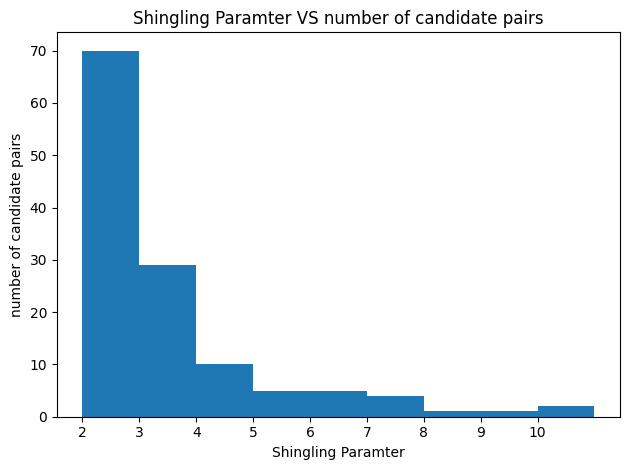

In [4]:
import matplotlib.pyplot as plt
rows = list(count_list.keys())
cols = list(count_list.values())
# plt.figure(figsize=(18,10))
fif, ax1 = plt.subplots(1)
ax1.bar(range(len(count_list)), cols,align='edge', width =1, tick_label=rows)
ax1.set_title("Shingling Paramter VS number of candidate pairs")
plt.xlabel("Shingling Paramter")
plt.ylabel("number of candidate pairs")
plt.tight_layout()
plt.show()